Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.9365 - loss: 0.1522 - val_accuracy: 0.9794 - val_loss: 0.0606
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.9804 - loss: 0.0587 - val_accuracy: 0.9809 - val_loss: 0.0577
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.9838 - loss: 0.0510 - val_accuracy: 0.9800 - val_loss: 0.0579


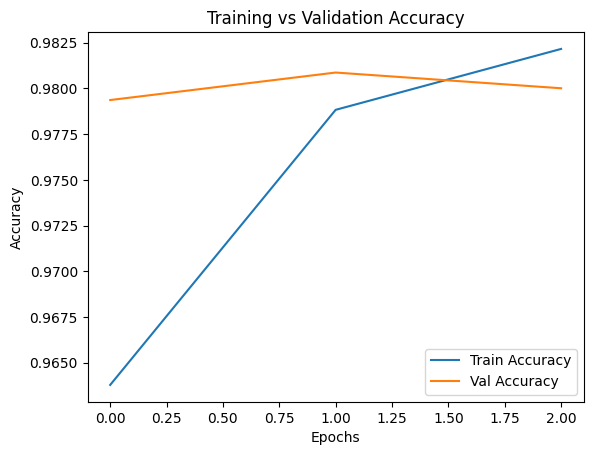

In [4]:
# MobileNetV2 Image Classification Project: Cats vs Dogs

# Step 1: Import Required Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Step 2: Load the Dataset
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# Step 3: Data Preprocessing
IMG_SIZE = 160
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(format_image, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

ds_val = ds_val.map(format_image, num_parallel_calls=AUTOTUNE)
ds_val = ds_val.batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Step 4: Load Pre-trained MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# Step 5: Add Custom Classification Head
global_avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(global_avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Step 6: Compile the Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 7: Train the Model
history = model.fit(
    ds_train,
    epochs=3,
    validation_data=ds_val
)

# Step 8: Save the Trained Model
model.save("cats_vs_dogs_mobilenetv2.h5")

# Step 9: Visualize Training History
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
